## 3.1 Nominal Problem

The costs for the nominal problem are below
- Facility cost: 21.50916629989814
- Transportation cost: 12.55731068395753

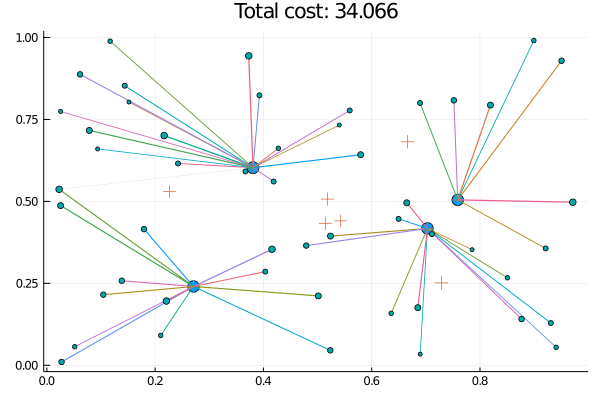

In [75]:
plt_nominal

## 3.2 Robust Problem
The costs for the robust problem are below
- Facility cost: 34.35670583607979
- Transportation cost: 16.2223369008492

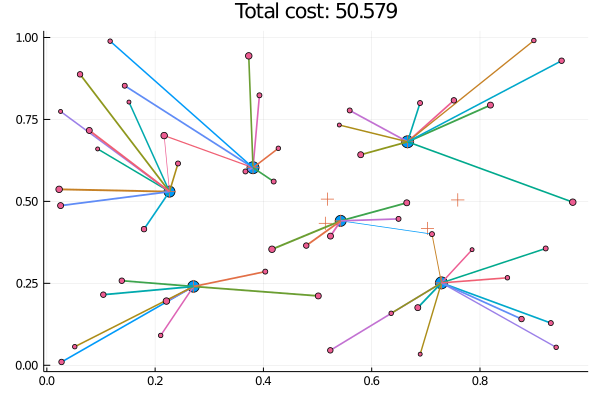

In [77]:
plt_robust 

The intuition behind the budget uncertainty set is that within the neighbors of the given radius $R_{D}=0.25$ we have at most 5 values (nodes) that deviate from their nominal values and subsequently affect its neighboring nodes. In other words, since the perturbation matrix $P$ is quite sparse, the worst case uncertainty set is going to make the more central nodes (who have many neighbors) deviate from its nominal values to make as many other demands deviate as well. 

## 3.3 Robust problem for various $R_{D}$

The solutions are below

In [79]:
results_df

,RD,SumP,TotalCost,FacilityCost,TransportationCost,NonzeroInP,OptNumOfFacilities
,Float32,Float32,Float32,Float32,Float32,Int64,Int64
1,0.05,10.3,36.56,22.6604,13.8997,54,4
2,0.075,12.9708,37.264,22.6604,14.6032,82,4
3,0.1,14.9422,38.009,23.4904,14.5186,98,4
4,0.125,18.3848,42.889,28.5491,14.3397,132,5
5,0.15,22.4184,43.81,28.5491,15.2605,170,5
6,0.175,27.5258,44.659,28.5491,16.11,220,5
7,0.2,32.7188,45.316,28.5491,16.767,268,5
8,0.225,38.247,45.947,28.3138,17.6329,318,5
9,0.25,43.9281,50.579,34.3567,16.2223,368,6


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[99]:1
└ @ Core In[99]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[99]:1
└ @ Core In[99]:1


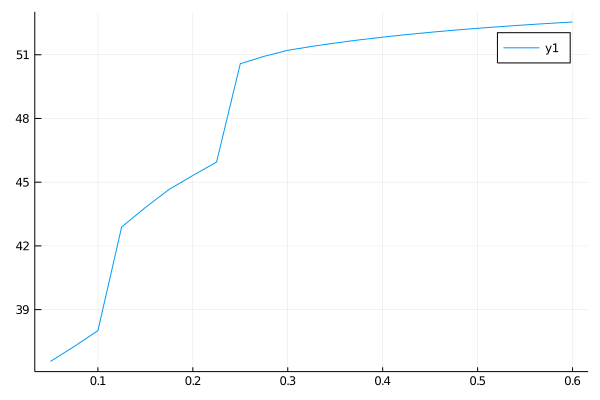

In [99]:
plot(results_df["RD"], results_df["TotalCost"])

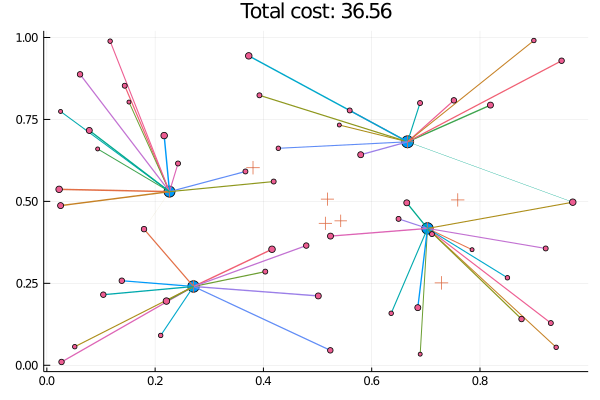

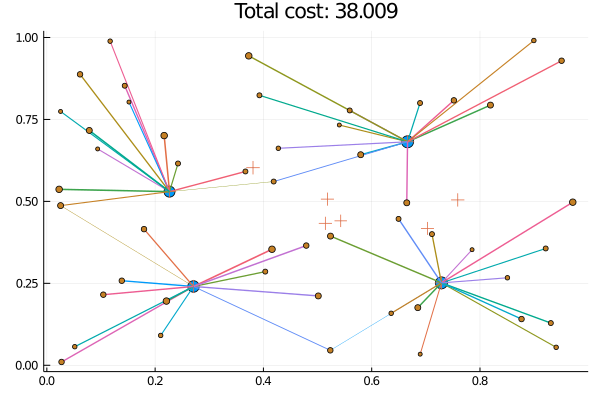

Facility cost: 22.660356610600125
Transportation cost: 13.899683582788619
Facility cost: 23.49038634245378
Transportation cost: 14.518645787525898


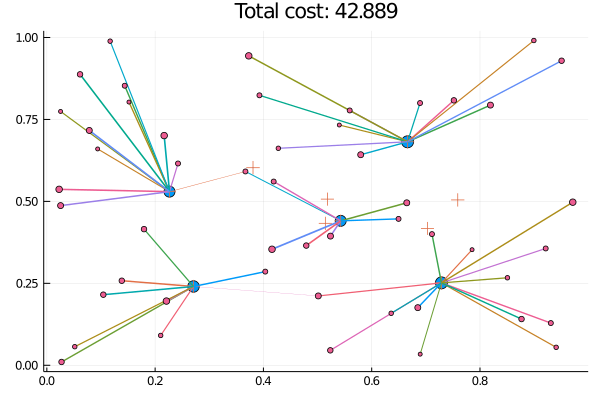

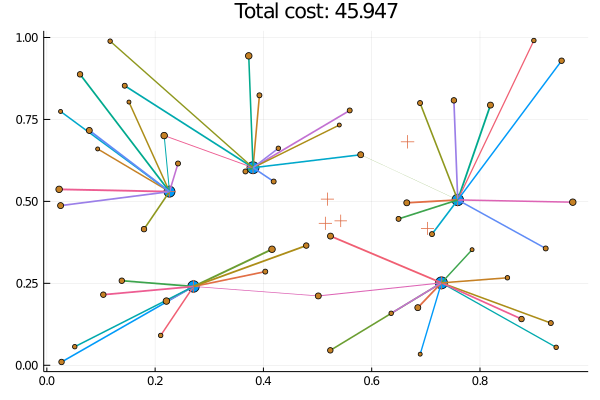

Facility cost: 28.549083748429716
Transportation cost: 14.33971023815635
Facility cost: 28.313834025203036
Transportation cost: 17.632931052853383

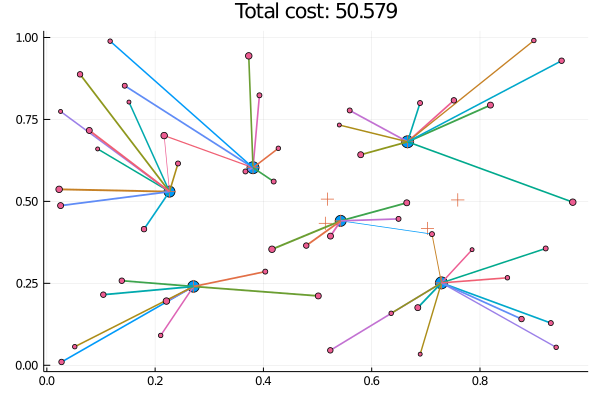


Facility cost: 34.35670583607979
Transportation cost: 16.2223369008492


In [80]:
for i in 1:length(unique_x)
    plt = plot_solution(unique_model[i], unique_x[i], unique_y[i])
    Plots.display(plt)
end

Looking at these results, the change in the facility set and the transportation paths do generally make sense with respect to $R_{D}$ given that whenever we increase $R_{D}$ we should expect a compound effect since it could affect many local neighborhoods. And indeed, if we look at the graph of $R_{D}$ versus total cost, there is a step-like pattern showing that the difficulty of satisfying the constraints rapidly increases and we quickly need more facilities. Moreover, we don't have too many unique facility locations because the optimizer is already picking $x$ to satisfy the worst case, so it's intuitive that if the worst case gets even worse ($R_{D}$ increases) then we probably only need to make adjustments to $Y$ and not $x$. 

Looking closely, we see that once we're in the range of $R_{D}=0.125$ we have to increase the number of facilities and then again at 0.225. In this way $R_{D}$ affects the problem by increasing the variety of demands that can be realized. In the extreme case, when $R_{D}=0$, we're saying that we don't care how many neighbors a node has, that one node only influences itself. In the extreme case $R_{D}=\infty$ we're saying it doesn't matter if a node is isolated or close to many others, it can affect the demands of everyone else. At the jump points, we're observing radiuses where the number of affected neighbors explodes, and this appears to happen twice.

Another observation is that total cost plateaus towards higher values of $R_{D}$. This is probabily because for large radiuses, each node already has a ton of neighbors and further increase does not increase the number of neighbors by much anymore. The only ones that gain more affected neighbors perhaps the ones at the edge. Overall, these results are intuitive on my understanding of the problem.

## 3.4 Adaptive Robust Solution
I used JuMPeR to solve this problem. This can be done by declaring that instead of $Y$ being just a decision variable, we're going to let it be adaptive with an affine policy and have it depend on $z$. The solution for the adaptive problem is below:
- Total cost: 36.121
- Facility cost: 22.660356610600125
- Transportation cost: 13.460643389399877

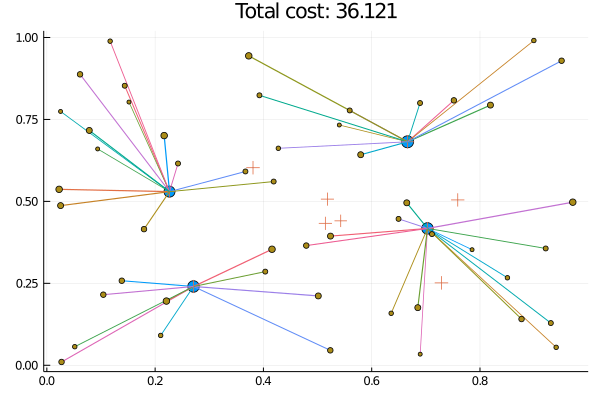

In [89]:
plt_aro

## 3.6 Hueristic Solution for faster solving

To solve the problem heuristically, one method I came up with is to relax the constraint that $x$ is binary in the ARO problem and instead let it be in the interval [0,1]. The idea behind this methodology is that the solution for the relaxed $x_{i}$ represents how much we rely on that facility. Hence, if in the relaxed problem if $x_{i}^{*}=0$, it means we don't need that facility at all (and vice versa if $x_{i}^{*}=1$). Then after we solve the relaxed problem, we can use a threshold to determine which of the $x^{*}$ to use. We use a threshold because simply round and taking any $x^{*} \geq 0.5$ to be 1 will only give us three facilities, which is infeasible. Hence, I change the threshold $t$ such that if $x_{i}^{*} \geq t$ then we fix $x_{i} = 1$ in the ARO problem. Using this method allows us to solve the method very quickly although as expected, the solution is significantly worse than the true ARO method.


The solution with this method is:
- Facility cost: 23.30957
- Transportation cost: 13.89442 

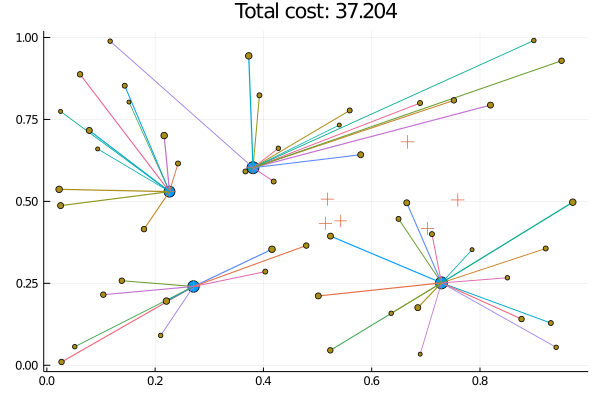

In [95]:
heuristic_plt 

# Code Below

In [ ]:
using JuMP, JuMPeR, Gurobi, Random, Distributions, LinearAlgebra, DataFrames, Plots, Distances

## 3.1 Nominal Problem


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
Facility cost: 21.50916629989814
Transportation cost: 12.55731068395753


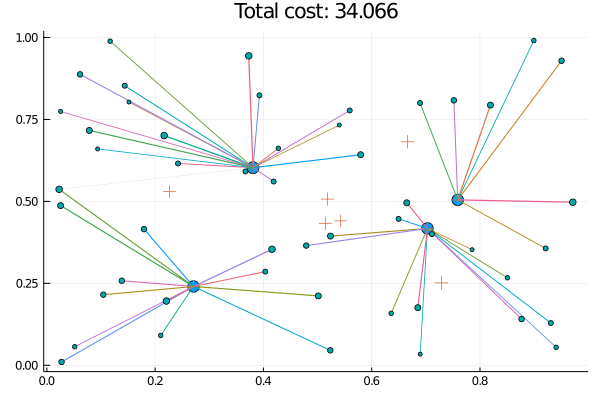

In [74]:
n = 10 # Number of facilities
m = 50 # Number of customers

# Generating random data (please don't change the seeds.)
facilities = 0.6.*rand(MersenneTwister(5), n,2) .+ 0.2;
customers = rand(MersenneTwister(2), m, 2); 
c = [LinearAlgebra.norm(customers[i, :] .- facilities[j, :])[1] for j=1:n, i=1:m];
f = rand(MersenneTwister(3), n)*1 .+ 5;
s = rand(MersenneTwister(4), n)*2 .+ 15;
d = rand(MersenneTwister(5), m)*0.5 .+ 0.75

""" Nominal facility location model. """
function facility_model(c::Matrix, f::Vector)
    n, m = size(c) 
    @assert length(f) == n
    model = Model(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
    @variable(model, x[1:n], Bin)      # Facility locations
    @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    # CONSTRAINTS
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j])      # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x[i]) # capacity constraint
    # OBJECTIVE
    @objective(model, Min, 
            sum(f[j] * x[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    return model, x, y
end

""" Plots the solution of the facility location model. 
Blue circles are active facilities with different capacities.
Orange plus signs are other potential facility locations.
Rays describe connections between facilities and demand nodes. 
"""
function plot_solution(model, x, y)
    plt = scatter(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s .* getvalue(x))
    scatter!(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s, markershape = :+)
    for i=1:n
        for j=1:m
            if getvalue(y[i,j]) >= 1e-10
                plot!([customers[j, 1], facilities[i,1]], [customers[j,2], facilities[i,2]], linewidth = getvalue(y[i,j]), legend=false)
        
            end
        end
    end
    scatter!(customers[:, 1], customers[:, 2], markersize = 3*d, 
            title = "Total cost: $(round(getobjectivevalue(model), sigdigits=5))")
    println("Facility cost: $(getvalue(sum(f[j] * x[j] for j = 1:n)))")
    println("Transportation cost: $(getvalue(sum(c[i, j] * y[i, j] for i=1:n, j=1:m)))")
    return plt
end

model, x, y = facility_model(c, f)

solve(model)

plt_nominal = plot_solution(model, x, y)

## 3.2 With uncertainty in D


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
Facility cost: 34.35670583607979
Transportation cost: 16.2223369008492


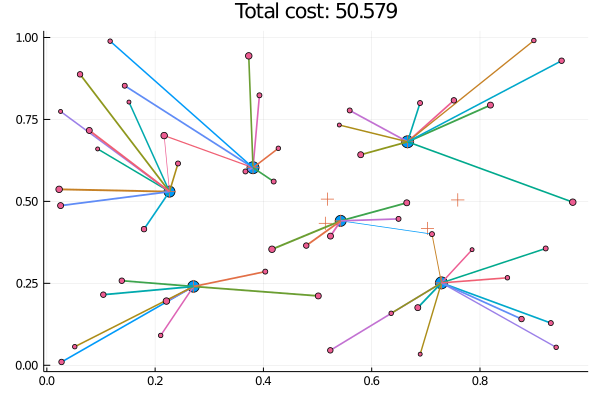

In [76]:
n = 10 # Number of facilities
m = 50 # Number of customers

# Generating random data (please don't change the seeds.)
facilities = 0.6.*rand(MersenneTwister(5), n,2) .+ 0.2;
customers = rand(MersenneTwister(2), m, 2); 
c = [LinearAlgebra.norm(customers[i, :] .- facilities[j, :])[1] for j=1:n, i=1:m];
f = rand(MersenneTwister(3), n)*1 .+ 5;
s = rand(MersenneTwister(4), n)*2 .+ 15;
d = rand(MersenneTwister(5), m)*0.5 .+ 0.75

""" Robust facility location model. """
function facility_model(c::Matrix, f::Vector, r_d)
    n, m = size(c) 
    @assert length(f) == n
    model = RobustModel(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
    @variable(model, x[1:n], Bin)      # Facility locations
    @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    # CONSTRAINTS
    # First define uncertainty parameters 
    @uncertain(model, z[1:m])
    @constraint(model, norm(z,   1) <= 5)  # ‖z‖₁ ≤ Γ
    @constraint(model, norm(z, Inf) <= 1)  # ‖z‖∞ ≤ 
    # create distance matrix
    dmat=pairwise(Euclidean(), customers, dims = 1)
    # create P matrix
    P = zeros(m,m)
    for i in 1:m
        for j in 1:m
            if (dmat[i,j] <= r_d) 
                P[i,j] = 0.2*exp(-(1/r_d)*dmat[i,j])
            else
                continue
            end
        end
    end

    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j] + sum([z[i]*P[j,i] for i in 1:m])) # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x[i]) # capacity constraint
    # OBJECTIVE
    @objective(model, Min, 
            sum(f[j] * x[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    # return model, facility, transport, 
    return model, x, y, P
end

""" Plots the solution of the facility location model. 
Blue circles are active facilities with different capacities.
Orange plus signs are other potential facility locations.
Rays describe connections between facilities and demand nodes. 
"""
function plot_solution(model, x, y)
    plt = scatter(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s .* getvalue(x))
    scatter!(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s, markershape = :+)
    for i=1:n
        for j=1:m
            if getvalue(y[i,j]) >= 1e-10
                plot!([customers[j, 1], facilities[i,1]], [customers[j,2], facilities[i,2]], linewidth = getvalue(y[i,j]), legend=false)
        
            end
        end
    end
    scatter!(customers[:, 1], customers[:, 2], markersize = 3*d, 
            title = "Total cost: $(round(getobjectivevalue(model), sigdigits=5))")
    println("Facility cost: $(getvalue(sum(f[j] * x[j] for j = 1:n)))")
    println("Transportation cost: $(getvalue(sum(c[i, j] * y[i, j] for i=1:n, j=1:m)))")
    return plt
end

model, x, y, P = facility_model(c, f, 0.25)

solve(model)

plt_robust = plot_solution(model, x, y)

The intuition behind the budget uncertainty set is that within the neighbors of the given radius $R_{D}=0.25$ we have at most 5 values (nodes) that deviate from their nominal values and subsequently affect its neighboring nodes. In other words, since the perturbation matrix $P$ is quite sparse, the worst case uncertainty set is going to make the more central nodes (many neighbors) deviate from its nominal values to make as many other demands deviate as well. 

## 3.3 Solve robust problem for various $R_D$

In [4]:
results_df = DataFrame(RD = Float32[], 
    SumP = Float32[], 
    TotalCost= Float32[],
    FacilityCost=Float32[],
    TransportationCost=Float32[],
    NonzeroInP=Int[],
    OptNumOfFacilities=Int[])

show(results_df,allrows=true,allcols=true)
prev_configs = []
unique_x = []
unique_y = []
unique_model = []

0×7 DataFrame


0-element Array{Any,1}

In [5]:
for r_d in collect(0.05:0.025:0.6)
    model, x, y, P = facility_model(c, f, r_d)
    solve(model)
    # check if facility config is unique
    F_conf = round.(getvalue(x))
    if F_conf in prev_configs
        # don't save if we've seen it before
    else
        push!(prev_configs, F_conf)
        push!(unique_x, x)
        push!(unique_y, y)
        push!(unique_model, model)
    end
    TD = r_d
    SumP = sum(P)
    TotalCost = round(getobjectivevalue(model), sigdigits=5)
    FC = getvalue(sum(f[j] * x[j] for j = 1:n))
    TC = getvalue(sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    NZIP=length([i for i in P if i >= 1e-5])
    NF = sum([i for i in getvalue(x) if i > 0.5] )
    results = [TD, SumP, TotalCost, FC, TC, NZIP, NF]
    push!(results_df, results);
end


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only

--------------------------

In [6]:
results_df

,RD,SumP,TotalCost,FacilityCost,TransportationCost,NonzeroInP,OptNumOfFacilities
,Float32,Float32,Float32,Float32,Float32,Int64,Int64
1,0.05,10.3,36.56,22.6604,13.8997,54,4
2,0.075,12.9708,37.264,22.6604,14.6032,82,4
3,0.1,14.9422,38.009,23.4904,14.5186,98,4
4,0.125,18.3848,42.889,28.5491,14.3397,132,5
5,0.15,22.4184,43.81,28.5491,15.2605,170,5
6,0.175,27.5258,44.659,28.5491,16.11,220,5
7,0.2,32.7188,45.316,28.5491,16.767,268,5
8,0.225,38.247,45.947,28.3138,17.6329,318,5
9,0.25,43.9281,50.579,34.3567,16.2223,368,6


Looking at the results above, it is quite intuitive. First of all, the cost even with the smallest $R_{D}$ is greater than the nominal problem which is expected. Then, as we expand $R_{D}$, it means that each node has a wider range of influence. With wider ranges, they influence each other more and the $P$ matrix becomes much denser, which causes the uncertainty effects to become more unstable as different $z$ are realized. Intuitively, there's a compounding effect where closeby neighbors are more affected by each other (e.g. talk to each other more, spreading information faster) and subsequently the uncertainty in demand is going to be much higher. This is reflected in the total cost variable as we would need to open more facilities when the nodes influence each other more and more to add more chaos into the uncertain demands, thus requiring more fulfilment capabilties. 

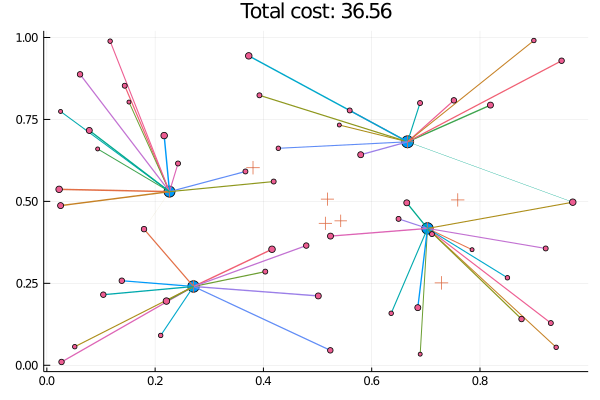

Facility cost: 22.660356610600125
Transportation cost: 13.899683582788619


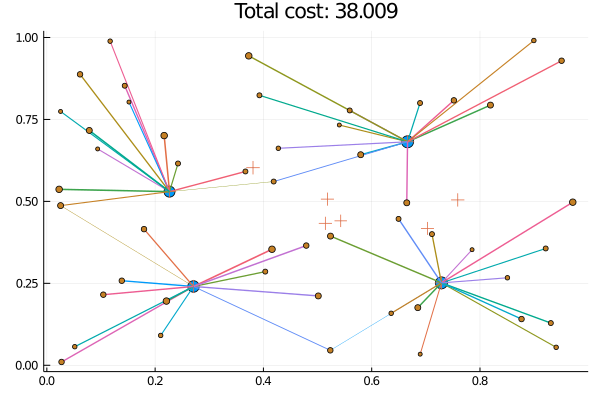

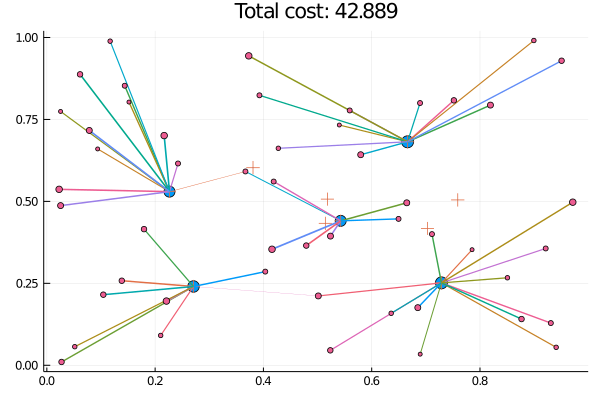

Facility cost: 23.49038634245378
Transportation cost: 14.518645787525898
Facility cost: 28.549083748429716
Transportation cost: 14.33971023815635


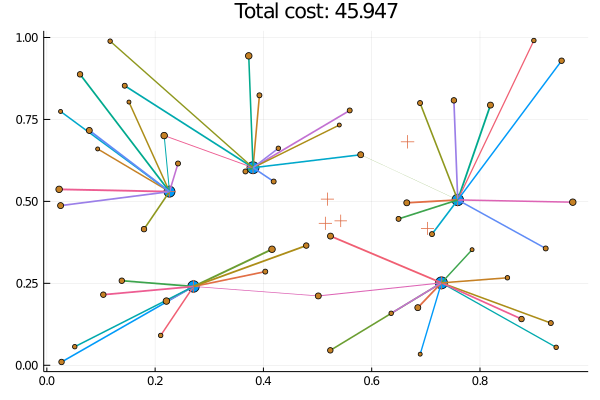

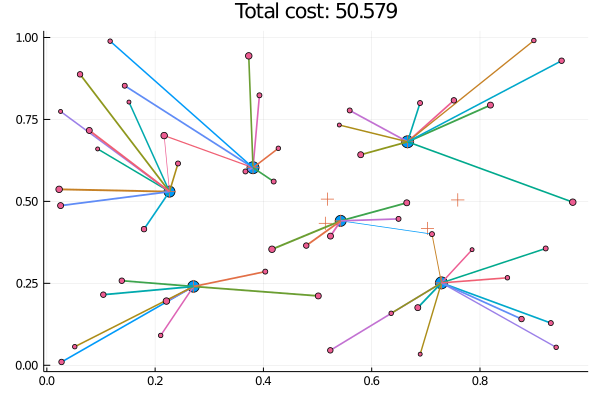

Facility cost: 28.313834025203036
Transportation cost: 17.632931052853383
Facility cost: 34.35670583607979
Transportation cost: 16.2223369008492


In [7]:
for i in 1:length(unique_x)
    plt = plot_solution(unique_model[i], unique_x[i], unique_y[i])
    Plots.display(plt)
end

## 3.4 Adaptive Optimization

In [8]:
function facility_model(c::Matrix, f::Vector, r_d)
    n, m = size(c) 
    @assert length(f) == n
    model = RobustModel(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
    @variable(model, x[1:n], Bin)      # Facility locations
#     @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    
    # CONSTRAINTS
    # First define uncertainty parameters 
    @uncertain(model, z[1:m])
    @constraint(model, norm(z,   1) <= 5)  # ‖z‖₁ ≤ Γ
    @constraint(model, norm(z, Inf) <= 1)  # ‖z‖∞ ≤ 
    # New adaptive flow variables 
    @adaptive(model, y[1:n, 1:m] >= 0, policy=Affine, depends_on=z)
    # create distance matrix
    dmat=pairwise(Euclidean(), customers, dims = 1)
    # create P matrix
    P = zeros(m,m)
    for i in 1:m
        for j in 1:m
            if (dmat[i,j] <= r_d) 
                P[i,j] = 0.2*exp(-(1/r_d)*dmat[i,j])
            else
                continue
            end
        end
    end
    
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j] + sum([z[i]*P[j,i] for i in 1:m])) # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x[i]) # capacity constraint
    # OBJECTIVE --> change to epigraph formulation under adaptive variable y(z)
    @variable(model, F)  # Overall cost
    @constraint(model, F >= sum(f[j] * x[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    @objective(model, Min, F)
    # return model, facility, transport, 
    return model, x, y, P
end

facility_model (generic function with 2 methods)

In [ ]:
model, x, y, P = facility_model(c, f, 0.25)

solve(model)

In [12]:
println("Total cost: $(round(getobjectivevalue(model), sigdigits=5))")
println("Facility cost: $(getvalue(sum(f[j] * x[j] for j = 1:n)))")
TC = (round(getobjectivevalue(model), sigdigits=5))-(getvalue(sum(f[j] * x[j] for j = 1:n)))
println("Transportation cost: $TC")
x_fixed = getvalue.(x)

Total cost: 36.121
Facility cost: 22.660356610600125
Transportation cost: 13.460643389399877


10-element Array{Float64,1}:
 -0.0
  1.0
 -0.0
 -0.0
  1.0
 -0.0
 -0.0
 -0.0
  1.0
  1.0


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
Facility cost: 22.66035
Transportation cost: 13.46064


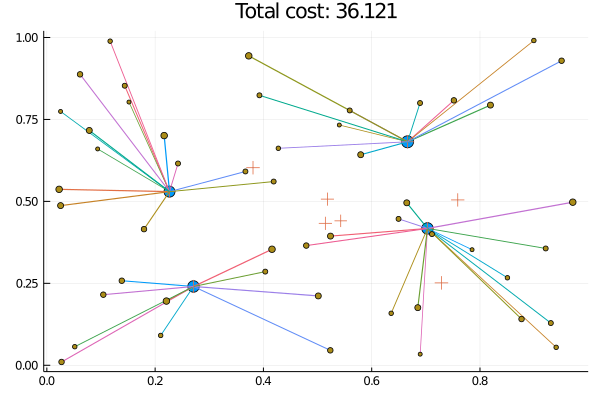

In [85]:
# Solve the nominal problem with fixed x[j] from the previous problem to get the plot
function facility_model(c::Matrix, f::Vector)
    n, m = size(c) 
    @assert length(f) == n
    model = Model(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
#     @variable(model, x[1:n], Bin)      # Facility locations
    @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    # CONSTRAINTS
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j])      # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x_fixed[i]) # capacity constraint
    # OBJECTIVE
    @objective(model, Min, 
            sum(f[j] * x_fixed[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    return model, y
end

function plot_solution(model, x, y)
    plt = scatter(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s .* (x))
    scatter!(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s, markershape = :+)
    for i=1:n
        for j=1:m
            if getvalue(y[i,j]) >= 1e-10
                plot!([customers[j, 1], facilities[i,1]], [customers[j,2], facilities[i,2]], linewidth = getvalue(y[i,j]), legend=false)
        
            end
        end
    end
    scatter!(customers[:, 1], customers[:, 2], markersize = 3*d, 
            title = "Total cost: 36.121")
    println("Facility cost: 22.66035")
    println("Transportation cost: 13.46064")
    return plt
end

model, y = facility_model(c, f)

solve(model)

plt_aro = plot_solution(model, x_fixed, y)

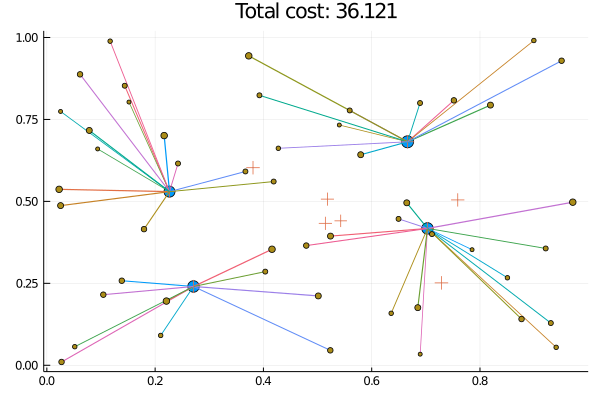

In [86]:
plt_aro

## 3.6 Implementing a method for quick-solving 
To implement a heuristic for quickly solving the problem, I will relax the constraint that $x_{i}$ is binary and solve the adaptive problem. Then, I will round the values of $x$ to the nearest integer and then used the fixed locations to solve the problem.

In [90]:
function facility_model(c::Matrix, f::Vector, r_d)
    n, m = size(c) 
    @assert length(f) == n
    model = RobustModel(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
    @variable(model, 0 <= x[1:n] <= 1)      # Facility locations
#     @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    
    # CONSTRAINTS
    # First define uncertainty parameters 
    @uncertain(model, z[1:m])
    @constraint(model, norm(z,   1) <= 5)  # ‖z‖₁ ≤ Γ
    @constraint(model, norm(z, Inf) <= 1)  # ‖z‖∞ ≤ 
    # New adaptive flow variables 
    @adaptive(model, y[1:n, 1:m] >= 0, policy=Affine, depends_on=z)
    # create distance matrix
    dmat=pairwise(Euclidean(), customers, dims = 1)
    # create P matrix
    P = zeros(m,m)
    for i in 1:m
        for j in 1:m
            if (dmat[i,j] <= r_d) 
                P[i,j] = 0.2*exp(-(1/r_d)*dmat[i,j])
            else
                continue
            end
        end
    end
    
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j] + sum([z[i]*P[j,i] for i in 1:m])) # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x[i]) # capacity constraint
    # OBJECTIVE --> change to epigraph formulation under adaptive variable y(z)
    @variable(model, F)  # Overall cost
    @constraint(model, F >= sum(f[j] * x[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    @objective(model, Min, F)
    # return model, facility, transport, 
    return model, x, y, P
end

model, x_cont, y, P = facility_model(c, f, 0.25)

solve(model)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only


:Optimal

In [91]:
# In this heuristic method, I try to out the top facilities until we get an optimal solution. Picking out 1,2,3 facilities
# leads to an infeasible solution
x_hueristic = getvalue.(x_cont) .>= 0.47

10-element BitArray{1}:
 false
 false
  true
  true
 false
 false
 false
 false
  true
  true

In [92]:
function facility_model(c::Matrix, f::Vector, r_d)
    n, m = size(c) 
    @assert length(f) == n
    model = RobustModel(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
#     @variable(model, x[1:n], Bin)      # Facility locations
#     @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    
    # CONSTRAINTS
    # First define uncertainty parameters 
    @uncertain(model, z[1:m])
    @constraint(model, norm(z,   1) <= 5)  # ‖z‖₁ ≤ Γ
    @constraint(model, norm(z, Inf) <= 1)  # ‖z‖∞ ≤ 
    # New adaptive flow variables 
    @adaptive(model, y[1:n, 1:m] >= 0, policy=Affine, depends_on=z)
    # create distance matrix
    dmat=pairwise(Euclidean(), customers, dims = 1)
    # create P matrix
    P = zeros(m,m)
    for i in 1:m
        for j in 1:m
            if (dmat[i,j] <= r_d) 
                P[i,j] = 0.2*exp(-(1/r_d)*dmat[i,j])
            else
                continue
            end
        end
    end
    
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j] + sum([z[i]*P[j,i] for i in 1:m])) # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x_hueristic[i]) # capacity constraint
    # OBJECTIVE --> change to epigraph formulation under adaptive variable y(z)
    @variable(model, F)  # Overall cost
    @constraint(model, F >= sum(f[j] * x_hueristic[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    @objective(model, Min, F)
    # return model, facility, transport, 
    return model, y, P
end

model, y, P = facility_model(c, f, 0.25)

solve(model)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only


:Optimal

In [93]:
println("Total cost: $(round(getobjectivevalue(model), sigdigits=5))")
println("Facility cost: $((sum(f[j] * x_hueristic[j] for j = 1:n)))")
TC = (round(getobjectivevalue(model), sigdigits=5))-((sum(f[j] * x_hueristic[j] for j = 1:n)))
println("Transportation cost: $TC")

Total cost: 37.204
Facility cost: 23.309576064602517
Transportation cost: 13.894423935397484



--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
Facility cost: 23.30957
Transportation cost: 13.89442


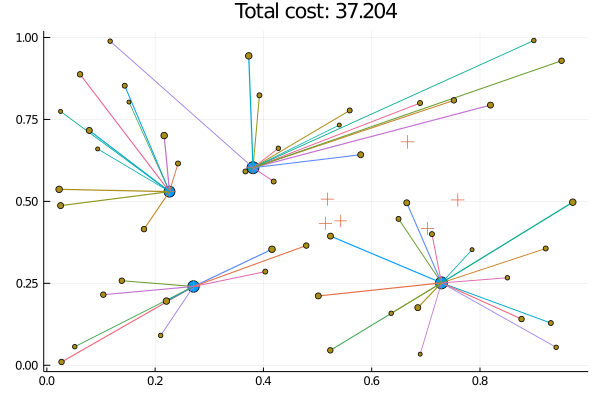

In [94]:
# Solve the nominal problem with fixed x[j] from the previous problem to get the plot
function facility_model(c::Matrix, f::Vector, x_heuristic)
    n, m = size(c) 
    @assert length(f) == n
    model = Model(solver = GurobiSolver(OutputFlag = 0))

    # VARIABLES
#     @variable(model, x[1:n], Bin)      # Facility locations
    @variable(model, y[1:n, 1:m] >= 0) # Flow variables
    # CONSTRAINTS
    @constraint(model, [j=1:m], sum(y[i, j] for i = 1:n) >= d[j])      # demand constraint
    @constraint(model, [i=1:n], sum(y[i, j] for j = 1:m) <= s[i]*x_hueristic[i]) # capacity constraint
    # OBJECTIVE
    @objective(model, Min, 
            sum(f[j] * x_hueristic[j] for j = 1:n) + sum(c[i, j] * y[i, j] for i=1:n, j=1:m))
    return model, y
end
function plot_solution(model, x, y)
    plt = scatter(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s .* (x))
    scatter!(facilities[:, 1], facilities[:, 2], markersize = 0.4 .* s, markershape = :+)
    for i=1:n
        for j=1:m
            if getvalue(y[i,j]) >= 1e-10
                plot!([customers[j, 1], facilities[i,1]], [customers[j,2], facilities[i,2]], linewidth = getvalue(y[i,j]), legend=false)
        
            end
        end
    end
    scatter!(customers[:, 1], customers[:, 2], markersize = 3*d, 
            title = "Total cost: 37.204")
    println("Facility cost: 23.30957")
    println("Transportation cost: 13.89442")
    return plt
end

model, y = facility_model(c, f, x_hueristic)

solve(model)

heuristic_plt = plot_solution(model, x_hueristic, y)